In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the flux calculation function with ergs-to-meV conversion
def Flux(L, r):
    return (L / (4 * np.pi * r**2))

#labels = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
labels = [0.4,0.5]
# Load the main data file
df1 = pd.read_csv('0.4.data', sep='\s+')
df2 = pd.read_csv('0.5.data', sep='\s+')


startage = []
endage = []
LNe = []
AgeNe = []
print(labels)



for file in labels:
    df = pd.read_csv(f'{file}.data',sep='\s+')
    
#    endage.append(df['star_age'].iloc[-1])
#    startage.append(df['star_age'].iloc[0])
#    LNe.append(df["log_Lneu"].values)
#    AgeNe.append(df["star_age"].values)    

#    print(len(df['star_age']))
    # Find the start of hydrogen burning: values where the condition is true
    condition = 10 * df['log_LH'] > 1 * 10 * df['log_L']
    
    # Check if there are any values that meet the condition
    if condition.any():
        # Get the first value of 'star_age' where the condition is True
        start_h_burning = df.loc[condition, 'star_age'].iloc[0]
    else:
        start_h_burning = None  # Or assign a default value like None or -1 if no value is found

    startage.append(start_h_burning)

    condition = df['center_h1']<1e-6

    if condition.any():
        # Get the first value of 'star_age' where the condition is True
        end_h_burning = df.loc[condition, 'star_age'].iloc[0]
    else:
        end_h_burning = None  # Or assign a default value like None or -1 if no value is found
    
    endage.append(end_h_burning)

    data = df[(df["star_age"] > start_h_burning) & (df["star_age"] < end_h_burning)]
    
    if 0.3 < file <0.6:

        LNe.append(data["log_Lneu"].values)
        AgeNe.append(data["star_age"].values)

    if file==0.4:
        Ln1 = data["log_Lneu"].values
        Age1 = data["star_age"].values
    if file==0.5:
        Ln2 = data["log_Lneu"].values
        Age2 = data["star_age"].values
        
    print(len(data))



print(LNe)
print(AgeNe)
print(startage)    
print(endage)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1824
1822
1898
1776
1667
1544
1401
1401
1264
1157
1090
1046
2278
2112
1949
2886
3314
3303
2629
2274
2155
1843
2018
1447
1585
1418
1362
1289
1075
1191
1029
1035
1028
1006
3505
3531
4236
4215
4185
4165
4113
4148
4140
4137
4103
4090
4057
[array([-3.06463298, -3.06486671, -3.06526026, ..., -2.46376384,
       -2.46345487, -2.46314617]), array([-2.83815362, -2.83836798, -2.83870008, ..., -2.15578551,
       -2.15546909, -2.15515445])]
[array([1.58796906e+08, 1.61663826e+08, 1.64413918e+08, ...,
       1.40811826e+11, 1.40820908e+11, 1.40829965e+11]), array([1.24294960e+08, 1.25465698e+08, 1.26611877e+08, ...,
       9.23840700e+10, 9.23900476e+10, 9.23960078e+10])]
[482456950.1242514, 302356919.2936459, 155770552.28398332, 123091749.85674964, 94803070.77571768, 70649854.72444242, 5513908

In [4]:

print(LNe,'\n',AgeNe)

[array([-3.06463298, -3.06486671, -3.06526026, ..., -2.46376384,
       -2.46345487, -2.46314617]), array([-2.83815362, -2.83836798, -2.83870008, ..., -2.15578551,
       -2.15546909, -2.15515445])] 
 [array([1.58796906e+08, 1.61663826e+08, 1.64413918e+08, ...,
       1.40811826e+11, 1.40820908e+11, 1.40829965e+11]), array([1.24294960e+08, 1.25465698e+08, 1.26611877e+08, ...,
       9.23840700e+10, 9.23900476e+10, 9.23960078e+10])]


In [5]:
# Find the minimum length among all datasets
min_length = min(len(data) for data in LNe)

# Cut all datasets to the same length
LNe_fixed = [data[:min_length] for data in LNe]
AgeNe_fixed = [data[:min_length] for data in AgeNe]

# Convert lists to arrays for regression
X = np.array(AgeNe_fixed).reshape(-1, 1)
y = np.array(LNe_fixed).reshape(-1, 1)

print(X.shape,y.shape)

from sklearn.linear_model import LinearRegression


labels = np.array(labels).reshape(-1,1)
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model1.fit(X,y)
model2.fit(labels,startage)
model3.fit(labels,endage)

(3552, 1) (3552, 1)


LinearRegression()

y(0.46) = 57511889.11711747


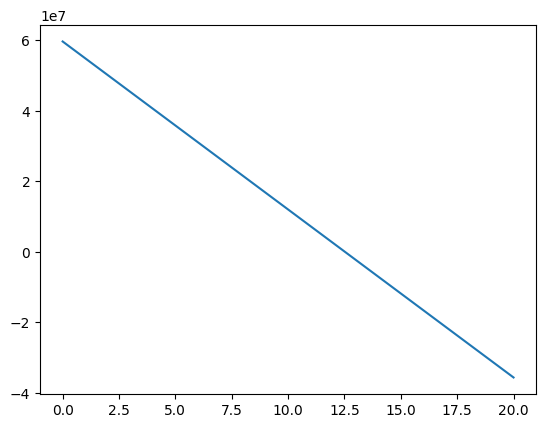

In [6]:
X = np.linspace(0,np.max(labels),1000)
Y = model2.predict(X[:,np.newaxis])
plt.plot(X,Y)
line = plt.gca().lines[0]  # Access the first line on the current axes
x_data = line.get_xdata()  # Get x-data from the line
y_data = line.get_ydata()  # Get y-data from the line

# Find y for a given x using interpolation
from scipy.interpolate import interp1d

f_interp = interp1d(x_data, y_data, kind='linear')  # Linear interpolation

M3 = 0.46
M3s = f_interp(M3)
print(f"y({M3}) = {M3s}")

y(0.46) = 62275537498.349976


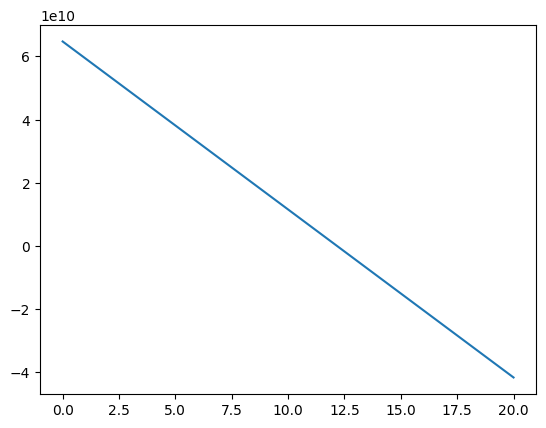

In [13]:
X = np.linspace(0,np.max(labels),1000)
Y = model3.predict(X[:,np.newaxis])
plt.plot(X,Y)
line = plt.gca().lines[0]  # Access the first line on the current axes
x_data = line.get_xdata()  # Get x-data from the line
y_data = line.get_ydata()  # Get y-data from the line

f_interp = interp1d(x_data, y_data, kind='linear')  # Linear interpolation

M3e = f_interp(M3)
print(f"y({M3}) = {M3e}")

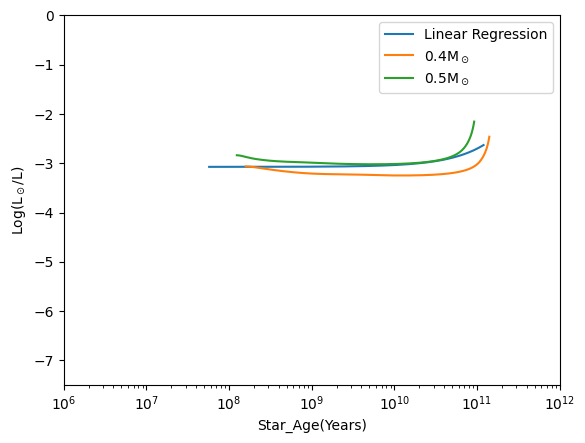

In [23]:
X = np.linspace(M3s,1.2e11,1000)
Y = model1.predict(X[:,np.newaxis])
plt.plot(X,Y,label='Linear Regression')
plt.plot(Age1,Ln1,label=r'0.4M$_\odot$')
plt.plot(Age2,Ln2,label=r'0.5M$_\odot$')
plt.xscale('log')
plt.ylim(-7.5,0)
plt.xlim(1e6,1e12)
plt.ylabel(r'Log(L$_\odot$/L)')
plt.xlabel('Star_Age(Years)')
plt.legend()       